[<Axes: > <Axes: >]
harmbench llama2 [(0, 27.666666666666668), (5, 11.666666666666666), (10, 16.666666666666668), (15, 9.333333333333334), (20, 26.333333333333332), (25, 17.333333333333332), (30, 9.333333333333334), (35, 31.666666666666668), (40, 31.666666666666668), (45, 28.666666666666668)]
harmbench llama2 20.296296296296294
harmbench vicuna [(0, 70.33333333333333), (5, 66.33333333333333), (10, 72.66666666666667), (15, 77.33333333333333), (20, 78.33333333333333), (25, 77.66666666666667), (30, 69.33333333333333), (35, 69.0), (40, 73.66666666666667), (45, 83.66666666666667)]
harmbench vicuna 74.22222222222221


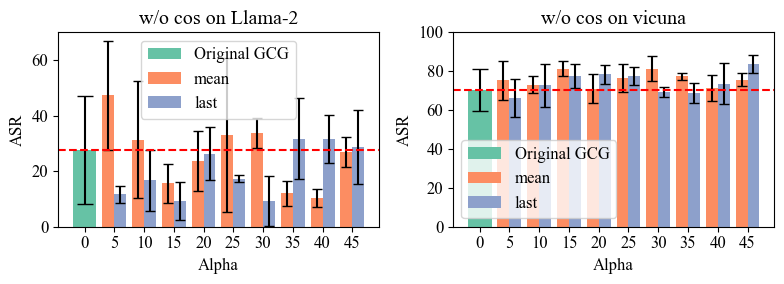

In [6]:
#多个
import re
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] = 12  # 替换成你想要的字体大小
# 定义数据
eval_methods = [ 'harmbench']#'kw_matching',,'llamaguard'
models=['llama2','vicuna']
folders = ['_without_cosdecay_and_lasthiddenstate','_with_cosdecay_and_lasthiddenstate',\
    '_with_cosdecay_and_mean_sentemb','_without_cosdecay_and_mean_sentemb']

mean={}
last={}
# 创建2x2子图
# 使用for循环绘制每个子图
for i, eval_method in enumerate(eval_methods):
    for j, model in enumerate(models):
        newmodel=model
        neweval_method=eval_method
        if model=='llama2':
            newmodel='Llama-2'
        if eval_method=='kw_matching':
            neweval_method='keyword matching'
        elif eval_method=='harmbench':
            neweval_method='HarmBench'
        elif eval_method=='llamaguard':
            neweval_method='Llama Guard'
        mean[neweval_method+newmodel]=[]
        for folder in folders:
            path='/home/yjj/llm-attacks/experiments/'+model+folder+'/'
            rounds=os.listdir(path)
            dirpaths=[path + round_+'/'+'eval_scripts/' +eval_method for round_ in rounds]
            for dirpath in dirpaths:
                for path in os.listdir(dirpath):
                    if path.endswith('log') and path.startswith('eval'):
                        al=int(re.findall(r'(?:alpha|search)_(\d+)',path)[0])
                        if al==0:
                            with open(os.path.join(dirpath,path),'r') as alpha:
                                content=alpha.read()
                                res=re.findall(r'Test Step (\d+)\/\d+ \| Jailbroken (\d+)\/(\d+)',content)
                                res=[[0,0,0]]+list(map(lambda x:[int(x[0]),int(x[1]),int(x[2])],res))
                                prev=res[0][1]
                                for k in range(len(res)):
                                    if res[k][2]==0:
                                        res[k][1]=prev
                                    prev=res[k][1]
                                mean[neweval_method+newmodel].append([k[1] for k in res])

        last[neweval_method+newmodel]=[]
        for folder in folders:
            path='/home/yjj/llm-attacks/experiments/'+model+folder+'/'
            rounds=os.listdir(path)
            dirpaths=[path + round_+'/'+'eval_scripts/' +eval_method for round_ in rounds]
            for dirpath in dirpaths:
                for path in os.listdir(dirpath):
                    if path.endswith('log') and path.startswith('eval'):
                        al=int(re.findall(r'(?:alpha|search)_(\d+)',path)[0])
                        if al==0:
                            with open(os.path.join(dirpath,path),'r') as alpha:
                                content=alpha.read()
                                res=re.findall(r'Test Step (\d+)\/\d+ \| Jailbroken (\d+)\/(\d+)',content)
                                res=[[0,0,0]]+list(map(lambda x:[int(x[0]),int(x[1]),int(x[2])],res))
                                prev=res[0][1]
                                for k in range(len(res)):
                                    if res[k][2]==0:
                                        res[k][1]=prev
                                    prev=res[k][1]
                                last[neweval_method+newmodel].append([k[1] for k in res])

# 创建2x2子图
fig, axs = plt.subplots(len(eval_methods), len(models), figsize=(4*len(models), 3*len(eval_methods)))
print(axs)
# 使用for循环绘制每个子图
for i, eval_method in enumerate(eval_methods):
    for j, model in enumerate(models):
        folder='_without_cosdecay_and_mean_sentemb'
        newmodel=model
        neweval_method=eval_method
        if model=='llama2':
            newmodel='Llama-2'
        if eval_method=='kw_matching':
            neweval_method='keyword matching'
        elif eval_method=='harmbench':
            neweval_method='HarmBench'
        elif eval_method=='llamaguard':
            neweval_method='Llama Guard'
        x=[]
        y_mean={}
        for al in range(0,50,5):
            y_mean[al]=[]
        if hasattr(axs,'__len__') and hasattr(axs[0],'__len__'):
            ax = axs[i, j]
        elif hasattr(axs,'__len__') and len(axs)==len(models):
            ax=axs[j]
        else:
            ax=axs
        path='/home/yjj/llm-attacks/experiments/'+model+folder+'/'
        rounds=os.listdir(path)
        dirpaths=[path + round_+'/'+'eval_scripts/' +eval_method for round_ in rounds]
        for dirpath in dirpaths:
            for path in os.listdir(dirpath):
                if path.endswith('log') and path.startswith('eval'):
                    al=int(re.findall(r'(?:alpha|search)_(\d+)',path)[0])
                    if al!=0:
                        with open(os.path.join(dirpath,path),'r') as alpha:
                            content=alpha.read()
                            res=re.findall(r'Test Step (\d+)\/\d+ \| Jailbroken (\d+)\/(\d+)',content)
                            res=[[0,0,0]]+list(map(lambda x:[int(x[0]),int(x[1]),int(x[2])],res))
                            prev=res[0][1]
                            for k in range(len(res)):
                                if res[k][2]==0:
                                    res[k][1]=prev
                                prev=res[k][1]
                            x=[k[0] for k in res]
                            y_mean[al].append([k[1] for k in res])
                    else:
                        y_mean[al]=mean[neweval_method+newmodel]
        # print(y)
        for al in range(0,50,5):
            # print(al)
            y_mean[al]=np.array(y_mean[al])

        mean_={}
        std_={}
        for al in range(0,50,5):
            mean_[al]=y_mean[al].mean(0)
            std_[al]=y_mean[al].std(0)
        mean__mean=np.array(list(mean_.values()))[:,-1]
        std__mean=np.array(list(std_.values()))[:,-1]



        folder='_without_cosdecay_and_lasthiddenstate'
        x=[]
        y_last={}
        for al in range(0,50,5):
            y_last[al]=[]
        path='/home/yjj/llm-attacks/experiments/'+model+folder+'/'
        rounds=os.listdir(path)
        dirpaths=[path + round_+'/'+'eval_scripts/' +eval_method for round_ in rounds]
        for dirpath in dirpaths:
            for path in os.listdir(dirpath):
                if path.endswith('log') and path.startswith('eval'):
                    al=int(re.findall(r'(?:alpha|search)_(\d+)',path)[0])
                    if al!=0:
                        with open(os.path.join(dirpath,path),'r') as alpha:
                            content=alpha.read()
                            res=re.findall(r'Test Step (\d+)\/\d+ \| Jailbroken (\d+)\/(\d+)',content)
                            res=[[0,0,0]]+list(map(lambda x:[int(x[0]),int(x[1]),int(x[2])],res))
                            prev=res[0][1]
                            for k in range(len(res)):
                                if res[k][2]==0:
                                    res[k][1]=prev
                                prev=res[k][1]
                            x=[k[0] for k in res]
                            y_last[al].append([k[1] for k in res])
                    else:
                        y_last[al]=mean[neweval_method+newmodel]
        for al in range(0,50,5):
            y_last[al]=np.array(y_last[al])

        mean_={}
        std_={}
        for al in range(0,50,5):
            mean_[al]=y_last[al].mean(0)
            std_[al]=y_last[al].std(0)
        mean__last=np.array(list(mean_.values()))[:,-1]
        std__last=np.array(list(std_.values()))[:,-1]


        # 使用 plt.bar() 函数创建柱形图
        bar_width = 2  # 设置条形的宽度
        colors=['#66c2a5', '#fc8d62', '#8da0cb']
        ax.bar(range(0,5,5),mean__mean[0:1],yerr=std__mean[0:1],width=bar_width*2,color=colors[0],error_kw = {'ecolor' : '0', 'capsize' :6 }, label='Original GCG')
        ax.bar(np.array(range(5,50,5))-bar_width / 2, mean__mean[1:],yerr=std__mean[1:],width=bar_width,color=colors[1],error_kw = {'ecolor' : '0', 'capsize' :3.5 },label='mean')
        ax.bar(np.array(range(5,50,5))+bar_width / 2, mean__last[1:],yerr=std__last[1:],width=bar_width,color=colors[2],error_kw = {'ecolor' : '0', 'capsize' :3.5 },label='last')
        # 添加标题和标签
        # 添加标题和标签
        ax.set_title(f"w/o cos on {newmodel}")
        ax.set_xlabel('Alpha')
        ax.set_ylabel('ASR')
        if model=='vicuna':
            ax.set_ylim(0,100)
        else:
            ax.set_ylim(0,70)
        ax.set_xticks(range(0,50,5))
        ax.axhline(y=mean__mean[0],color='red', linestyle='--')
        # 显示图形
        if eval_method=='harmbench':
            print(eval_method,model,[(k,v[-1]) for k,v in mean_.items()])
        import numpy as np
        if eval_method=='harmbench':
            print(eval_method,model,np.mean([v[-1] for k,v in mean_.items() if k!=0]))
        ax.legend()
# 调整布局以防止重叠
plt.tight_layout()
plt.savefig('withoutcos.png',dpi=300)
plt.show()

[<Axes: > <Axes: >]
harmbench llama2 [(0, 27.666666666666668), (5, 19.333333333333332), (10, 29.666666666666668), (15, 24.333333333333332), (20, 31.0), (25, 36.666666666666664), (30, 9.333333333333334), (35, 20.333333333333332), (40, 42.666666666666664), (45, 22.0)]
harmbench llama2 26.148148148148145
harmbench vicuna [(0, 70.33333333333333), (5, 65.66666666666667), (10, 84.66666666666667), (15, 76.66666666666667), (20, 71.66666666666667), (25, 68.66666666666667), (30, 70.66666666666667), (35, 81.0), (40, 70.66666666666667), (45, 83.0)]
harmbench vicuna 74.74074074074075


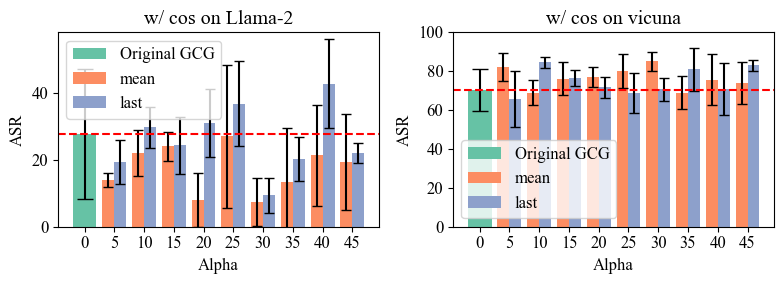

In [7]:
#多个
import re
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] = 12  # 替换成你想要的字体大小
# 定义数据
eval_methods = [ 'harmbench']#'kw_matching',,'llamaguard'
models=['llama2','vicuna']
folders = ['_without_cosdecay_and_lasthiddenstate','_with_cosdecay_and_lasthiddenstate',\
    '_with_cosdecay_and_mean_sentemb','_without_cosdecay_and_mean_sentemb']

mean={}
last={}
# 创建2x2子图
# 使用for循环绘制每个子图
for i, eval_method in enumerate(eval_methods):
    for j, model in enumerate(models):
        newmodel=model
        neweval_method=eval_method
        if model=='llama2':
            newmodel='Llama-2'
        if eval_method=='kw_matching':
            neweval_method='keyword matching'
        elif eval_method=='harmbench':
            neweval_method='HarmBench'
        elif eval_method=='llamaguard':
            neweval_method='Llama Guard'
        mean[neweval_method+newmodel]=[]
        for folder in folders:
            path='/home/yjj/llm-attacks/experiments/'+model+folder+'/'
            rounds=os.listdir(path)
            dirpaths=[path + round_+'/'+'eval_scripts/' +eval_method for round_ in rounds]
            for dirpath in dirpaths:
                for path in os.listdir(dirpath):
                    if path.endswith('log') and path.startswith('eval'):
                        al=int(re.findall(r'(?:alpha|search)_(\d+)',path)[0])
                        if al==0:
                            with open(os.path.join(dirpath,path),'r') as alpha:
                                content=alpha.read()
                                res=re.findall(r'Test Step (\d+)\/\d+ \| Jailbroken (\d+)\/(\d+)',content)
                                res=[[0,0,0]]+list(map(lambda x:[int(x[0]),int(x[1]),int(x[2])],res))
                                prev=res[0][1]
                                for k in range(len(res)):
                                    if res[k][2]==0:
                                        res[k][1]=prev
                                    prev=res[k][1]
                                mean[neweval_method+newmodel].append([k[1] for k in res])

        last[neweval_method+newmodel]=[]
        for folder in folders:
            path='/home/yjj/llm-attacks/experiments/'+model+folder+'/'
            rounds=os.listdir(path)
            dirpaths=[path + round_+'/'+'eval_scripts/' +eval_method for round_ in rounds]
            for dirpath in dirpaths:
                for path in os.listdir(dirpath):
                    if path.endswith('log') and path.startswith('eval'):
                        al=int(re.findall(r'(?:alpha|search)_(\d+)',path)[0])
                        if al==0:
                            with open(os.path.join(dirpath,path),'r') as alpha:
                                content=alpha.read()
                                res=re.findall(r'Test Step (\d+)\/\d+ \| Jailbroken (\d+)\/(\d+)',content)
                                res=[[0,0,0]]+list(map(lambda x:[int(x[0]),int(x[1]),int(x[2])],res))
                                prev=res[0][1]
                                for k in range(len(res)):
                                    if res[k][2]==0:
                                        res[k][1]=prev
                                    prev=res[k][1]
                                last[neweval_method+newmodel].append([k[1] for k in res])

# 创建2x2子图
fig, axs = plt.subplots(len(eval_methods), len(models), figsize=(4*len(models), 3*len(eval_methods)))
print(axs)
# 使用for循环绘制每个子图
for i, eval_method in enumerate(eval_methods):
    for j, model in enumerate(models):
        folder='_with_cosdecay_and_mean_sentemb'
        newmodel=model
        neweval_method=eval_method
        if model=='llama2':
            newmodel='Llama-2'
        if eval_method=='kw_matching':
            neweval_method='keyword matching'
        elif eval_method=='harmbench':
            neweval_method='HarmBench'
        elif eval_method=='llamaguard':
            neweval_method='Llama Guard'
        x=[]
        y_mean={}
        for al in range(0,50,5):
            y_mean[al]=[]
        if hasattr(axs,'__len__') and hasattr(axs[0],'__len__'):
            ax = axs[i, j]
        elif hasattr(axs,'__len__') and len(axs)==len(models):
            ax=axs[j]
        else:
            ax=axs
        path='/home/yjj/llm-attacks/experiments/'+model+folder+'/'
        rounds=os.listdir(path)
        dirpaths=[path + round_+'/'+'eval_scripts/' +eval_method for round_ in rounds]
        for dirpath in dirpaths:
            for path in os.listdir(dirpath):
                if path.endswith('log') and path.startswith('eval'):
                    al=int(re.findall(r'(?:alpha|search)_(\d+)',path)[0])
                    if al!=0:
                        with open(os.path.join(dirpath,path),'r') as alpha:
                            content=alpha.read()
                            res=re.findall(r'Test Step (\d+)\/\d+ \| Jailbroken (\d+)\/(\d+)',content)
                            res=[[0,0,0]]+list(map(lambda x:[int(x[0]),int(x[1]),int(x[2])],res))
                            prev=res[0][1]
                            for k in range(len(res)):
                                if res[k][2]==0:
                                    res[k][1]=prev
                                prev=res[k][1]
                            x=[k[0] for k in res]
                            y_mean[al].append([k[1] for k in res])
                    else:
                        y_mean[al]=mean[neweval_method+newmodel]
        # print(y)
        for al in range(0,50,5):
            # print(al)
            y_mean[al]=np.array(y_mean[al])

        mean_={}
        std_={}
        for al in range(0,50,5):
            mean_[al]=y_mean[al].mean(0)
            std_[al]=y_mean[al].std(0)
        mean__mean=np.array(list(mean_.values()))[:,-1]
        std__mean=np.array(list(std_.values()))[:,-1]



        folder='_with_cosdecay_and_lasthiddenstate'
        x=[]
        y_last={}
        for al in range(0,50,5):
            y_last[al]=[]
        path='/home/yjj/llm-attacks/experiments/'+model+folder+'/'
        rounds=os.listdir(path)
        dirpaths=[path + round_+'/'+'eval_scripts/' +eval_method for round_ in rounds]
        for dirpath in dirpaths:
            for path in os.listdir(dirpath):
                if path.endswith('log') and path.startswith('eval'):
                    al=int(re.findall(r'(?:alpha|search)_(\d+)',path)[0])
                    if al!=0:
                        with open(os.path.join(dirpath,path),'r') as alpha:
                            content=alpha.read()
                            res=re.findall(r'Test Step (\d+)\/\d+ \| Jailbroken (\d+)\/(\d+)',content)
                            res=[[0,0,0]]+list(map(lambda x:[int(x[0]),int(x[1]),int(x[2])],res))
                            prev=res[0][1]
                            for k in range(len(res)):
                                if res[k][2]==0:
                                    res[k][1]=prev
                                prev=res[k][1]
                            x=[k[0] for k in res]
                            y_last[al].append([k[1] for k in res])
                    else:
                        y_last[al]=mean[neweval_method+newmodel]
        for al in range(0,50,5):
            y_last[al]=np.array(y_last[al])

        mean_={}
        std_={}
        for al in range(0,50,5):
            mean_[al]=y_last[al].mean(0)
            std_[al]=y_last[al].std(0)
        mean__last=np.array(list(mean_.values()))[:,-1]
        std__last=np.array(list(std_.values()))[:,-1]


        # 使用 plt.bar() 函数创建柱形图
        bar_width = 2  # 设置条形的宽度
        colors=['#66c2a5', '#fc8d62', '#8da0cb']
        ax.bar(range(0,5,5),mean__mean[0:1],yerr=std__mean[0:1],width=bar_width*2,color=colors[0],error_kw = {'ecolor' : '0', 'capsize' :6 }, label='Original GCG')
        ax.bar(np.array(range(5,50,5))-bar_width / 2, mean__mean[1:],yerr=std__mean[1:],width=bar_width,color=colors[1],error_kw = {'ecolor' : '0', 'capsize' :3.5 },label='mean')
        ax.bar(np.array(range(5,50,5))+bar_width / 2, mean__last[1:],yerr=std__last[1:],width=bar_width,color=colors[2],error_kw = {'ecolor' : '0', 'capsize' :3.5 },label='last')
        # 添加标题和标签
        # 添加标题和标签
        ax.set_title(f"w/ cos on {newmodel}")
        ax.set_xlabel('Alpha')
        ax.set_ylabel('ASR')
        if model=='vicuna':
            ax.set_ylim(0,100)
        else:
            ax.set_ylim(0,58)
        ax.set_xticks(range(0,50,5))
        ax.axhline(y=mean__mean[0],color='red', linestyle='--')
        # 显示图形
        if eval_method=='harmbench':
            print(eval_method,model,[(k,v[-1]) for k,v in mean_.items()])
        import numpy as np
        if eval_method=='harmbench':
            print(eval_method,model,np.mean([v[-1] for k,v in mean_.items() if k!=0]))
        ax.legend()
# 调整布局以防止重叠
plt.tight_layout()
plt.savefig('withcos.png',dpi=300)
plt.show()

In [3]:
import torch
x=torch.tensor([1,2,3,4])
x.reshape(-1,4)

tensor([[1, 2, 3, 4]])

In [4]:
y=torch.zeros([3,4])
y[0]=x
y

tensor([[1., 2., 3., 4.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])